# 2 Cricket Project - Predicting the Market Value of Individual Cricketers in the India Premier League - exploratory data analysis

## 2.1 Introduction

Although cricket may be seen as a niche sport, and is only played in a limited number of countries, it has genuine claims to being a global sport and a major international business. Stemming from Great Britain, and to some extents spread by the former British Empire, cricket is played domestically and internationally by a growing number of countries, although there are clear distinctions between top tier playing nations and those in other tiers. However, the professionalism and commercialisation of the sport is breaking down those distinctions and barriers faster than at any other time in the history of the sport. In part this is due to the changing formats of the game. Historically, cricket matches were played over a number of days until they finished (with no set time for completion). This could result in games of significantly varying lengths, from a  couple of days to a couple of weeks (games being based on two innings per side (and 11 players by side), with the winning side being the team with the highest overall score in those two innings). After the end of the Second World War, this practice stopped and the role of broadcasting rights (and associated advertising revenue) has played an increasing role in setting the parameters and formats for the game. So, from the end of the Second World War, international cricket became limited to five days, with an acceptance that there would be an increase in the number of unconcluded, hence drawn games. Over time, pressure to adapt the game at international level, and grow the business of the game has seen different formats emerge, from one-day limited-overs cricket (eg, 40, 50  or 60 overs per side, which is usually manageable within one day) to shorter formats such as T20 (high-intensity, fast-paced 20-over cricket, that is finished within a matter of hours, a form of heresy for older cricket fans brought up on longer, slower and more strategic forms of the game).

At the same time, the power base of cricket has moved from England/Great Britain to South Asia, in particular India, where the appeal, popuplarity, market and revenue for all forms of cricket is massive. Globalisation, the internet, cheaper/easier travel have also created internation cricket competitions and formats outside of the historical/traditional competitions where one country competes against another in a Test (5-day cricket match) series. Now, most senior cricket playing nations will host their own domestic competitions, which are also genuinely international competitions open to cricketers and teams from around the world. Nowhere is this better exemplified than in the Indian Premier League, where a number of team franchises bid for Indian and international players at an auction to build a team that will compete in April/May of each year to win the annual trophy and lucrative prices. The audiences in the huge India stadia are massive, but are dwarfed by the national and international television/online audiences and the betting market associated with the games. Players from around the world flock to the IPL for the money and the fame, confounding the traditional domestic route to cricketing fame and glory - many players prefer to compete in the IPL than to be available for international selection in their own countries. It is a fact of life that national cricketing authorities have had to accept the financial reality of events such as the IPL or the Australian Big Bash and adapt their own local/national cricket leagues and competitions to fit in with the international markets. And the situation continues to shift, as participation in the IPL is now seen as beneficial to the development of certain or different types of cricketers at international level. There is always something to learn in both directions it seems.

The datasets used in this project have been drawn from publicly available international cricket data, setting out individual players' performance in traditional international cricketing formats, while drawing up the publicly available IPL data on the most recent player auction (December 2021 for the 2022 season) and also the IPL's historic player performance data. Furthermore, reference data from international cricket "salaries"/retainers is available. 

The aim is to analyse the data to see if a model can be developed to predict accurately the value of the current/upcoming stars of the IPL. Overpaid upstarts or worth their weight in gold? What makes the most valuable IPL player and are they worth it? Let's see.

## 2.2 Imports

In [2]:
#import relevant packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## 2.3 Load the data
### 2.3.1 IPL data

In [3]:
#Load data and check appearance
IPLPriceNPerf21_22 = pd.read_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\interim_data\March23\IPLPriceNPerf21_22cleaneddata.csv')
IPLPriceNPerf21_22.head()


,Unnamed: 0,Player,Country,Team,Type,Auction_Base_price,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
0,0,Deepak Chahar,India,Chennai Super Kings,Bowler,140000000,1396080.0,4.0,2.0,1.0,...,14.0,32.214286,8.351852,23.142857,2.0,0.0,132.0,5.0,0.0,0.0
1,1,Ambati Rayudu,India,Chennai Super Kings,Wicket-Keeper,67500000,673110.0,26.0,4.0,531.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.0,0.0,0.0
2,2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,44000000,438768.0,6.0,6.0,70.0,...,30.0,18.733333,8.363095,13.440000,0.0,0.0,143.0,5.0,0.0,0.0
3,3,Shivam Dube,India,Chennai Super Kings,All-Rounder,40000000,398880.0,18.0,2.0,519.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,8.0,8.0,0.0,0.0
4,4,Chris Jordan,England,Chennai Super Kings,All-Rounder,36000000,358992.0,4.0,1.0,43.0,...,6.0,38.500000,9.428571,24.500000,0.0,0.0,23.0,4.0,1.5,0.0


In [4]:
IPLPriceNPerf21_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             782 non-null    int64  
 1   Player                 782 non-null    object 
 2   Country                782 non-null    object 
 3   Team                   782 non-null    object 
 4   Type                   782 non-null    object 
 5   Auction_Base_price     782 non-null    int64  
 6   Auc_Base_price_pounds  782 non-null    float64
 7   Bat_Inns_21_22         175 non-null    float64
 8   NOs_21_22              175 non-null    float64
 9   Run_21_22              175 non-null    float64
 10  HS_21                  175 non-null    float64
 11  HS_22                  175 non-null    float64
 12  Bat_Avg_21_22          175 non-null    float64
 13  BF_21_22               175 non-null    float64
 14  BatSR_21_22            175 non-null    float64
 15  100s_2

In [5]:
IPLPriceNPerf21_22.shape

(782, 32)

In [6]:
del IPLPriceNPerf21_22['Unnamed: 0']
IPLPriceNPerf21_22.head()

,Player,Country,Team,Type,Auction_Base_price,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
0,Deepak Chahar,India,Chennai Super Kings,Bowler,140000000,1396080.0,4.0,2.0,1.0,1.0,...,14.0,32.214286,8.351852,23.142857,2.0,0.0,132.0,5.0,0.0,0.0
1,Ambati Rayudu,India,Chennai Super Kings,Wicket-Keeper,67500000,673110.0,26.0,4.0,531.0,72.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.0,0.0,0.0
2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,44000000,438768.0,6.0,6.0,70.0,23.0,...,30.0,18.733333,8.363095,13.440000,0.0,0.0,143.0,5.0,0.0,0.0
3,Shivam Dube,India,Chennai Super Kings,All-Rounder,40000000,398880.0,18.0,2.0,519.0,64.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,8.0,8.0,0.0,0.0
4,Chris Jordan,England,Chennai Super Kings,All-Rounder,36000000,358992.0,4.0,1.0,43.0,30.0,...,6.0,38.500000,9.428571,24.500000,0.0,0.0,23.0,4.0,1.5,0.0


### 2.3.2 International data

In [7]:
#Load data and check appearance
IntCrickSals = pd.read_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\interim_data\March23\InternatCrickSalspartcleaneddata.csv')
IntCrickSals.head()

,Unnamed: 0,Players,Country,Retainer Fee / contract / base salary,Test Fee,ODI Fee,T20 Fee,Base_sal_pounds
0,0,Babar Azam,Pakistan,1.25 million PKR (+ undisclosed Captain allowa...,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
1,1,Mohammad Rizwan,Pakistan,1.25 million PKR per month,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
2,2,Hasan Ali,Pakistan,1.25 million PKR per month,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
3,3,Shaheen Afridi,Pakistan,1.25 million PKR per month,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
4,4,Azhar Ali,Pakistan,"937,500 PKRper month","PKR 40,000",0,0,39375.0


In [8]:
del IntCrickSals['Unnamed: 0']
IntCrickSals.head()

,Players,Country,Retainer Fee / contract / base salary,Test Fee,ODI Fee,T20 Fee,Base_sal_pounds
0,Babar Azam,Pakistan,1.25 million PKR (+ undisclosed Captain allowa...,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
1,Mohammad Rizwan,Pakistan,1.25 million PKR per month,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
2,Hasan Ali,Pakistan,1.25 million PKR per month,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
3,Shaheen Afridi,Pakistan,1.25 million PKR per month,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
4,Azhar Ali,Pakistan,"937,500 PKRper month","PKR 40,000",0,0,39375.0


In [9]:
IntCrickSals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Players                                176 non-null    object 
 1   Country                                176 non-null    object 
 2   Retainer Fee / contract / base salary  176 non-null    object 
 3   Test Fee                               176 non-null    object 
 4   ODI Fee                                176 non-null    object 
 5   T20 Fee                                176 non-null    object 
 6   Base_sal_pounds                        176 non-null    float64
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [10]:
IntCrickSals.shape

(176, 7)

## 2.4 Explore the data
### 2.4.1 IPL data
The dataset to concentrate on is the IPLPriceNPerf21_22 dataset (as this already has all the performance data for the last two seasons linked with the auction sales data).

In [11]:
#Looking at IPL_Price and Performance Stats in more detail
IPLPriceNPerf21_22.columns


Index(['Player', 'Country', 'Team', 'Type', 'Auction_Base_price',
       'Auc_Base_price_pounds', 'Bat_Inns_21_22', 'NOs_21_22', 'Run_21_22',
       'HS_21', 'HS_22', 'Bat_Avg_21_22', 'BF_21_22', 'BatSR_21_22',
       '100s_21_22', '50s_21_22', '4s_21_22', '6s_21_22', 'Bowl_Inns_21_22',
       'Ov_21_22', 'BowlRunsConc_21_22', 'Wkts_21_22', 'Bowl_Avg_21_22',
       'Econ_21_22', 'BowlSR_21_22', '4w_21_22', '5w_21_22', 'Dots_21_22',
       'Catches_21_22', 'Run outs', 'Stumpings_21_22'],
      dtype='object')

In [12]:
IPLPriceNPerf21_22.head()


,Player,Country,Team,Type,Auction_Base_price,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
0,Deepak Chahar,India,Chennai Super Kings,Bowler,140000000,1396080.0,4.0,2.0,1.0,1.0,...,14.0,32.214286,8.351852,23.142857,2.0,0.0,132.0,5.0,0.0,0.0
1,Ambati Rayudu,India,Chennai Super Kings,Wicket-Keeper,67500000,673110.0,26.0,4.0,531.0,72.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.0,0.0,0.0
2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,44000000,438768.0,6.0,6.0,70.0,23.0,...,30.0,18.733333,8.363095,13.440000,0.0,0.0,143.0,5.0,0.0,0.0
3,Shivam Dube,India,Chennai Super Kings,All-Rounder,40000000,398880.0,18.0,2.0,519.0,64.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,8.0,8.0,0.0,0.0
4,Chris Jordan,England,Chennai Super Kings,All-Rounder,36000000,358992.0,4.0,1.0,43.0,30.0,...,6.0,38.500000,9.428571,24.500000,0.0,0.0,23.0,4.0,1.5,0.0


In [13]:
#Drop the column with auction price in rupees
IPLPriceNPerf21_22 = IPLPriceNPerf21_22.drop(['Auction_Base_price'], axis=1)
IPLPriceNPerf21_22.head(3)


,Player,Country,Team,Type,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,HS_22,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
0,Deepak Chahar,India,Chennai Super Kings,Bowler,1396080.0,4.0,2.0,1.0,1.0,0.0,...,14.0,32.214286,8.351852,23.142857,2.0,0.0,132.0,5.0,0.0,0.0
1,Ambati Rayudu,India,Chennai Super Kings,Wicket-Keeper,673110.0,26.0,4.0,531.0,72.0,78.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.0,0.0,0.0
2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,438768.0,6.0,6.0,70.0,23.0,12.0,...,30.0,18.733333,8.363095,13.440000,0.0,0.0,143.0,5.0,0.0,0.0


In [14]:
IPLPriceNPerf21_22.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 782 non-null    object 
 1   Country                782 non-null    object 
 2   Team                   782 non-null    object 
 3   Type                   782 non-null    object 
 4   Auc_Base_price_pounds  782 non-null    float64
 5   Bat_Inns_21_22         175 non-null    float64
 6   NOs_21_22              175 non-null    float64
 7   Run_21_22              175 non-null    float64
 8   HS_21                  175 non-null    float64
 9   HS_22                  175 non-null    float64
 10  Bat_Avg_21_22          175 non-null    float64
 11  BF_21_22               175 non-null    float64
 12  BatSR_21_22            175 non-null    float64
 13  100s_21_22             175 non-null    float64
 14  50s_21_22              175 non-null    float64
 15  4s_21_

In [15]:
#Check categories within Team - shows majority of players listed were unsold in the auction
IPLPriceNPerf21_22['Team'].value_counts()

Unsold                         517
Rajasthan Royals                30
Sunrisers Hyderabad             30
Gujarat Titans                  27
Kolkata Knight Riders           27
Chennai Super Kings             26
Lucknow Super Giants            26
Punjab Kings                    26
Royal Challengers Bangalore     26
Mumbai Indians                  24
Delhi Capitals                  23
Name: Team, dtype: int64

In [16]:
#Check breakdown by player type
IPLPriceNPerf21_22['Type'].value_counts()

All-Rounder      297
Bowler           265
Batsman          132
Wicket-Keeper     88
Name: Type, dtype: int64

In [17]:
#Separate unsold players
IPL_Unsold = IPLPriceNPerf21_22[IPLPriceNPerf21_22['Team']=='Unsold']
IPL_Unsold.head()

,Player,Country,Team,Type,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,HS_22,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
185,Suresh Raina,India,Unsold,Batsman,199440.0,22.0,2.0,160.0,54.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
186,Steve Smith,Australia,Unsold,Batsman,199440.0,14.0,1.0,152.0,39.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187,Imran Tahir,South Africa,Unsold,Bowler,199440.0,0.0,0.0,0.0,0.0,0.0,...,2.0,8.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
188,Mujeeb Zadran,Afghanistan,Unsold,Bowler,199440.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,James Vince,England,Unsold,Batsman,199440.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So, have a problem with the range/number of missing values in this dataframe. Because players tend to be classed primarily as either Batsmen, Bowlers or All-rounders, we may inevitably have some missing values for batting stats where a player is primarily a bowler, and vice versa. For All-rounders (ie, players who bat and bowl), we have data on both aspects. Wicket-keepers tend also to be batsmen, so we will have batting stats for them. 

We also have both Sold and Unsold players in the full dataset - so, where they have not played in previous IPLs, there will be no performance data on them, so there will be a large number of null values, 22 by my reckoning for each player. So, if we can tally up which rows have this level of null data, we can then remove the rows in full. (It would be useful to keep these removed rows, for if we can attach other performance data to them, then we could use this to find what might be a suitable price, particularly for those that were sold, but are IPL first-timers.) Then for the remaining null values we can legitimately assign zero to them. 

In [18]:
#Count number of null values in row
for i in range(len(IPLPriceNPerf21_22.index)):
    print(" Total NaN in row", i + 1, ":",
          IPLPriceNPerf21_22.iloc[i].isnull().sum())

 Total NaN in row 1 : 0
 Total NaN in row 2 : 0
 Total NaN in row 3 : 0
 Total NaN in row 4 : 0
 Total NaN in row 5 : 0
 Total NaN in row 6 : 0
 Total NaN in row 7 : 0
 Total NaN in row 8 : 0
 Total NaN in row 9 : 25
 Total NaN in row 10 : 0
 Total NaN in row 11 : 0
 Total NaN in row 12 : 0
 Total NaN in row 13 : 0
 Total NaN in row 14 : 25
 Total NaN in row 15 : 0
 Total NaN in row 16 : 0
 Total NaN in row 17 : 25
 Total NaN in row 18 : 0
 Total NaN in row 19 : 25
 Total NaN in row 20 : 0
 Total NaN in row 21 : 0
 Total NaN in row 22 : 0
 Total NaN in row 23 : 25
 Total NaN in row 24 : 0
 Total NaN in row 25 : 0
 Total NaN in row 26 : 0
 Total NaN in row 27 : 0
 Total NaN in row 28 : 0
 Total NaN in row 29 : 0
 Total NaN in row 30 : 25
 Total NaN in row 31 : 25
 Total NaN in row 32 : 0
 Total NaN in row 33 : 25
 Total NaN in row 34 : 25
 Total NaN in row 35 : 0
 Total NaN in row 36 : 25
 Total NaN in row 37 : 0
 Total NaN in row 38 : 0
 Total NaN in row 39 : 0
 Total NaN in row 40 : 0

 Total NaN in row 335 : 25
 Total NaN in row 336 : 25
 Total NaN in row 337 : 25
 Total NaN in row 338 : 25
 Total NaN in row 339 : 25
 Total NaN in row 340 : 25
 Total NaN in row 341 : 25
 Total NaN in row 342 : 25
 Total NaN in row 343 : 25
 Total NaN in row 344 : 25
 Total NaN in row 345 : 25
 Total NaN in row 346 : 25
 Total NaN in row 347 : 25
 Total NaN in row 348 : 25
 Total NaN in row 349 : 25
 Total NaN in row 350 : 25
 Total NaN in row 351 : 25
 Total NaN in row 352 : 25
 Total NaN in row 353 : 25
 Total NaN in row 354 : 25
 Total NaN in row 355 : 25
 Total NaN in row 356 : 25
 Total NaN in row 357 : 25
 Total NaN in row 358 : 25
 Total NaN in row 359 : 25
 Total NaN in row 360 : 25
 Total NaN in row 361 : 25
 Total NaN in row 362 : 25
 Total NaN in row 363 : 25
 Total NaN in row 364 : 25
 Total NaN in row 365 : 25
 Total NaN in row 366 : 0
 Total NaN in row 367 : 25
 Total NaN in row 368 : 25
 Total NaN in row 369 : 25
 Total NaN in row 370 : 25
 Total NaN in row 371 : 25
 T

 Total NaN in row 650 : 25
 Total NaN in row 651 : 25
 Total NaN in row 652 : 25
 Total NaN in row 653 : 25
 Total NaN in row 654 : 25
 Total NaN in row 655 : 25
 Total NaN in row 656 : 25
 Total NaN in row 657 : 25
 Total NaN in row 658 : 25
 Total NaN in row 659 : 25
 Total NaN in row 660 : 25
 Total NaN in row 661 : 25
 Total NaN in row 662 : 25
 Total NaN in row 663 : 25
 Total NaN in row 664 : 25
 Total NaN in row 665 : 25
 Total NaN in row 666 : 25
 Total NaN in row 667 : 25
 Total NaN in row 668 : 25
 Total NaN in row 669 : 25
 Total NaN in row 670 : 25
 Total NaN in row 671 : 25
 Total NaN in row 672 : 25
 Total NaN in row 673 : 25
 Total NaN in row 674 : 25
 Total NaN in row 675 : 25
 Total NaN in row 676 : 25
 Total NaN in row 677 : 25
 Total NaN in row 678 : 25
 Total NaN in row 679 : 25
 Total NaN in row 680 : 25
 Total NaN in row 681 : 25
 Total NaN in row 682 : 25
 Total NaN in row 683 : 25
 Total NaN in row 684 : 25
 Total NaN in row 685 : 25
 Total NaN in row 686 : 25
 

In [19]:
#Create subset of players who don't have any performance data attributed to them
#(using balls faced and overs as the targets identifies them as not having played in a game)
IPLPriceNPerf21_22_removed_players = IPLPriceNPerf21_22[IPLPriceNPerf21_22['BF_21_22'].isnull() & IPLPriceNPerf21_22['Ov_21_22'].isnull()]
IPLPriceNPerf21_22_removed_players.head()



,Player,Country,Team,Type,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,HS_22,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
8,Rajvardhan Hangargekar,India,Chennai Super Kings,All-Rounder,149580.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,C.Hari Nishaanth,India,Chennai Super Kings,Batsman,19944.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Subhranshu Senapati,India,Chennai Super Kings,Batsman,19944.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,K.Bhagath Varma,India,Chennai Super Kings,All-Rounder,19944.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Syed Khaleel Ahmed,India,Delhi Capitals,Bowler,523530.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
IPLPriceNPerf21_22_removed_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 8 to 781
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 607 non-null    object 
 1   Country                607 non-null    object 
 2   Team                   607 non-null    object 
 3   Type                   607 non-null    object 
 4   Auc_Base_price_pounds  607 non-null    float64
 5   Bat_Inns_21_22         0 non-null      float64
 6   NOs_21_22              0 non-null      float64
 7   Run_21_22              0 non-null      float64
 8   HS_21                  0 non-null      float64
 9   HS_22                  0 non-null      float64
 10  Bat_Avg_21_22          0 non-null      float64
 11  BF_21_22               0 non-null      float64
 12  BatSR_21_22            0 non-null      float64
 13  100s_21_22             0 non-null      float64
 14  50s_21_22              0 non-null      float64
 15  4s_21_

In [21]:
#Look at the removed players list by Team
IPLPriceNPerf21_22_removed_players['Team'].value_counts()

Unsold                         496
Royal Challengers Bangalore     14
Mumbai Indians                  13
Rajasthan Royals                13
Sunrisers Hyderabad             13
Punjab Kings                    11
Gujarat Titans                  10
Kolkata Knight Riders           10
Lucknow Super Giants            10
Delhi Capitals                   9
Chennai Super Kings              8
Name: Team, dtype: int64

So, worth bearing in mind that 111 players were purchased, but haven't played in the IPL before so no IPL performance data available for them. May need to come back to this group of players.

In [22]:
#Drop rows with at least 10 non-Na values
IPLPriceNPerf21_22 = IPLPriceNPerf21_22.dropna(thresh=10)
IPLPriceNPerf21_22 = IPLPriceNPerf21_22.reset_index(drop=True)
IPLPriceNPerf21_22.head()

,Player,Country,Team,Type,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,HS_22,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
0,Deepak Chahar,India,Chennai Super Kings,Bowler,1396080.0,4.0,2.0,1.0,1.0,0.0,...,14.0,32.214286,8.351852,23.142857,2.0,0.0,132.0,5.0,0.0,0.0
1,Ambati Rayudu,India,Chennai Super Kings,Wicket-Keeper,673110.0,26.0,4.0,531.0,72.0,78.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.0,0.0,0.0
2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,438768.0,6.0,6.0,70.0,23.0,12.0,...,30.0,18.733333,8.363095,13.440000,0.0,0.0,143.0,5.0,0.0,0.0
3,Shivam Dube,India,Chennai Super Kings,All-Rounder,398880.0,18.0,2.0,519.0,64.0,95.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,8.0,8.0,0.0,0.0
4,Chris Jordan,England,Chennai Super Kings,All-Rounder,358992.0,4.0,1.0,43.0,30.0,6.0,...,6.0,38.500000,9.428571,24.500000,0.0,0.0,23.0,4.0,1.5,0.0


In [23]:
IPLPriceNPerf21_22.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 175 non-null    object 
 1   Country                175 non-null    object 
 2   Team                   175 non-null    object 
 3   Type                   175 non-null    object 
 4   Auc_Base_price_pounds  175 non-null    float64
 5   Bat_Inns_21_22         175 non-null    float64
 6   NOs_21_22              175 non-null    float64
 7   Run_21_22              175 non-null    float64
 8   HS_21                  175 non-null    float64
 9   HS_22                  175 non-null    float64
 10  Bat_Avg_21_22          175 non-null    float64
 11  BF_21_22               175 non-null    float64
 12  BatSR_21_22            175 non-null    float64
 13  100s_21_22             175 non-null    float64
 14  50s_21_22              175 non-null    float64
 15  4s_21_

In [24]:
IPLPriceNPerf21_22.shape


(175, 30)

So in an earlier version of this notebook, the IPL_Price_Stats dataset had become quite small/short, so I carried out further research on the sources of the datasets which highlighted more detailed historical data was available from the IPL on player performance, and there was additional auction data from the sale in December 2022.  It was also clear that the performance data gathered at that point had been limited to the higher performing players and so was not fully representative of all players. Furthermore the data tended to concentrate on their specialism, so excluded any reference to their non-specialist skills. Given that T20, like any form of cricket, is a team sport, this may be relevant data to analyse.

So I gathered more data to get a better/fuller representation of the situation and values of the players that have been bought. This has resulted in a larger pool of players (now 175) being available for price and performance analysis.

In [25]:
#Check columns for missing values
IPLPriceNPerf21_22.isnull().sum()

Player                   0
Country                  0
Team                     0
Type                     0
Auc_Base_price_pounds    0
Bat_Inns_21_22           0
NOs_21_22                0
Run_21_22                0
HS_21                    0
HS_22                    0
Bat_Avg_21_22            0
BF_21_22                 0
BatSR_21_22              0
100s_21_22               0
50s_21_22                0
4s_21_22                 0
6s_21_22                 0
Bowl_Inns_21_22          0
Ov_21_22                 0
BowlRunsConc_21_22       0
Wkts_21_22               0
Bowl_Avg_21_22           0
Econ_21_22               0
BowlSR_21_22             0
4w_21_22                 0
5w_21_22                 0
Dots_21_22               0
Catches_21_22            0
Run outs                 0
Stumpings_21_22          0
dtype: int64

 Great - before at this stage, we'd discovered that a load of top players had missing values. 

In [26]:
#Set 'Player' column as index so that sort data based on players
IPLPriceNPerf21_22_NewIndex = IPLPriceNPerf21_22.set_index('Player')

Let's look at auction price, Batting Average, Highest Score (HS), Batting Strike Rate (Bats_SR), Wickets, Bowling Average, Economy and Bowling strike rate (Bowl_SR) - key stats in cricket.


In [27]:
#Highest price players sorted
IPLPriceNPerf21_22_NewIndex.Auc_Base_price_pounds.sort_values(ascending=False).head(10)

Player
Sam Curran           1844820.0
Ben Stokes           1620450.0
Nicholas Pooran      1595520.0
Ishan Kishan         1520730.0
Deepak Chahar        1396080.0
Shreyas Iyer         1221570.0
Liam Livingstone     1146780.0
Shardul Thakur       1071990.0
Harshal Patel        1071990.0
Wanindu Hasaranga    1071990.0
Name: Auc_Base_price_pounds, dtype: float64

## 2.4.2 Batting

In [28]:
#Highest batting averages
IPLPriceNPerf21_22_NewIndex.Bat_Avg_21_22.sort_values(ascending=False).head(10)

Player
Chris Lynn         49.000000
Rajat Patidar      47.571429
Devon Conway       36.000000
Shikhar Dhawan     34.900000
Quinton De Kock    33.866667
Mitchell Marsh     31.375000
David Warner       31.350000
Jason Roy          30.000000
Aiden Markram      29.277778
Faf Du Plessis     29.250000
Name: Bat_Avg_21_22, dtype: float64

In [29]:
#Highest scores 2021
IPLPriceNPerf21_22_NewIndex.HS_21.sort_values(ascending=False).head(10)

Player
Devdutt Padikkal    101.0
Mayank Agarwal       99.0
Shikhar Dhawan       92.0
Ishan Kishan         84.0
Nitish Rana          80.0
Rahul Tripathi       74.0
Ambati Rayudu        72.0
Manish Pandey        69.0
Pat Cummins          66.0
Kane Williamson      66.0
Name: HS_21, dtype: float64

In [30]:
#Highest scores 2022
IPLPriceNPerf21_22_NewIndex.HS_22.sort_values(ascending=False).head(10)

Player
Quinton De Kock    140.0
Rajat Patidar      112.0
Faf Du Plessis      96.0
Shivam Dube         95.0
David Miller        94.0
David Warner        92.0
Mitchell Marsh      89.0
Robin Uthappa       88.0
Shikhar Dhawan      88.0
Devon Conway        87.0
Name: HS_22, dtype: float64

In [31]:
#Batting strike rate (runs per 100 balls faced)
IPLPriceNPerf21_22_NewIndex.BatSR_21_22.sort_values(ascending=False).head(10)

Player
Prerak Mankad       400.000000
Tim David           210.112360
Pat Cummins         195.000000
Sam Curran          193.103448
Liam Livingstone    170.462633
Mohammad Nabi       170.000000
Avesh Khan          168.750000
Dwayne Bravo        166.666667
Aman Khan           166.666667
Jitesh Sharma       163.636364
Name: BatSR_21_22, dtype: float64

A real mixture of names in the Top 10 lists, indicating it's not always easy to judge who's the best player. Batting average tends to be a good indicator of consistent run scores, with Highest Score susceptible to being an outlier in a player's range of scores, if it's not backed up by a good average. Strike rate (number of runs per 100 balls faced) is arguably a strong indicator of batting performance/success in the shorter, more dynamic and explosive form of cricket, where runs on the board at speed will often win the match (and the money!)

So strange that the higher performing batters don't seem to feature highly in the auction prices, with the exception of Liam Livingstone (not in high averages, but a very strong strike rate). Otherwise David Warner, David Miller, Faf du Plessis and Tim David stand out in the lists.

## 2.4.3 Bowling

In [32]:
#Total wickets
IPLPriceNPerf21_22_NewIndex.Wkts_21_22.sort_values(ascending=False).head(10)

Player
Harshal Patel       51.0
Yuzvendra Chahal    45.0
Avesh Khan          42.0
Mohammad Shami      39.0
Kagiso Rabada       38.0
Shardul Thakur      36.0
Josh Hazlewood      31.0
Prasidh Krishna     31.0
Dwayne Bravo        30.0
Jason Holder        30.0
Name: Wkts_21_22, dtype: float64

In [33]:
#Bowling averages - lower value is better
BowlAvAbovZero = IPLPriceNPerf21_22_NewIndex[IPLPriceNPerf21_22_NewIndex['Bowl_Avg_21_22'] > 0]
BowlAvAbovZero.Bowl_Avg_21_22.sort_values(ascending=True).head(10)


Player
Ayush Badoni          5.500000
Imran Tahir           8.000000
Dewald Brevis         8.000000
Ramandeep Singh       9.000000
Moises Henriques     11.250000
Jimmy Neesham        13.200000
Mohsin Khan          14.071429
Abhishek Sharma      16.000000
Wanindu Hasaranga    16.538462
Harshal Patel        17.039216
Name: Bowl_Avg_21_22, dtype: float64

In [34]:
#Economy rate - lower is better (ie, fewer runs given away per over)
IPLPriceNPerf21_22_NewIndex[IPLPriceNPerf21_22_NewIndex['Econ_21_22'] > 0].Econ_21_22.sort_values(ascending=True).head(10)

Player
Imran Tahir            4.000000
Moises Henriques       4.500000
Ayush Badoni           5.500000
Mohsin Khan            5.969697
Prashant Solanki       6.333333
Nathan Coulter-Nile    6.350000
Abhishek Sharma        6.400000
David Willey           6.545455
Mahipal Lomror         6.714286
Mitchell Santner       6.842105
Name: Econ_21_22, dtype: float64

In [35]:
#Bowling strike rate - lower is better (ie, fewer balls before get a wicket and remove a batsman)
IPLPriceNPerf21_22_NewIndex[IPLPriceNPerf21_22_NewIndex['BowlSR_21_22'] > 0].BowlSR_21_22.sort_values(ascending=True).head(10)


Player
Dewald Brevis         1.800000
Ayush Badoni          6.000000
Ramandeep Singh       6.000000
Jimmy Neesham        10.800000
Imran Tahir          12.000000
Glenn Phillips       12.000000
Navdeep Saini        12.000000
Harshal Patel        12.858824
Wanindu Hasaranga    13.153846
Dwayne Bravo         13.440000
Name: BowlSR_21_22, dtype: float64

Again, a mixed bag of bowlers here, and slightly harder to pull out the key statistics here. Economy and strike rate are clearly crucial and go hand in hand well, so interesting to see that no-one features in both those lists. Bowling average is a good longer term indicator, and of course nothing beats the results that overall wickets taken shows/proves. Names that stand out include Harshal Patel, Dwayne Bravo and Imran Tahir (and note that he seems to have two entries, so need to look at that).

## 2.4.4 Pricing and purchasing

In [36]:
#Check unique player names
IPLPriceNPerf21_22['Player'].nunique()

175

Also, need to bring together a list of all auctioned players, so that can analyse purchasing habits of each team/franchise, but to be useful this ideally needs link with some form of player assessment/rating, and not all have this - how to do? 

In the meantime, let's look at some of the performance data, but after we've dropped the null values in IPL_Price_Stats

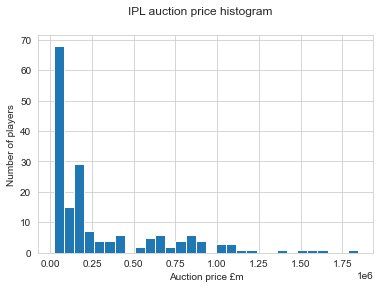

In [72]:
fig, ax = plt.subplots()
_ = ax.hist(IPLPriceNPerf21_22['Auc_Base_price_pounds'], bins=30)
_ = ax.set_xlabel('Auction price £m')
_ = ax.set_ylabel('Number of players')
plt.suptitle('IPL auction price histogram')
plt.savefig('IPL auction price histogram')
plt.show()

So, pile 'em high, sell 'em cheap seems to be a general approach within the league, with the majority of players sold at a cheaper price and only a handful of stars at the upper end of the price range.

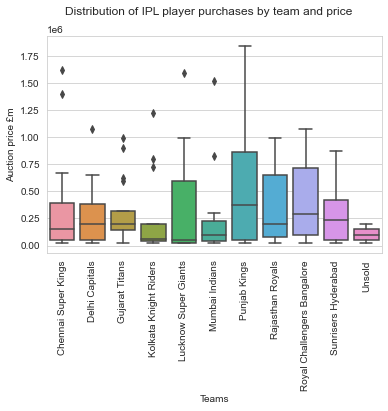

In [73]:
g=sns.boxplot(data=IPLPriceNPerf21_22, x='Team', y='Auc_Base_price_pounds')
plt.xlabel("Teams")
plt.xticks(rotation=90)
plt.ylabel("Auction price £m")
plt.suptitle('Distribution of IPL player purchases by team and price')
plt.savefig('Distribution of IPL player purchases')
plt.show()

Some interesting variations purchasing data between the different teams/franchises, particularly towards the right-hand side of the chart. Only a few outliers - are they really worth that much?
Let's plot some similar boxplots for key batting and bowling stats.

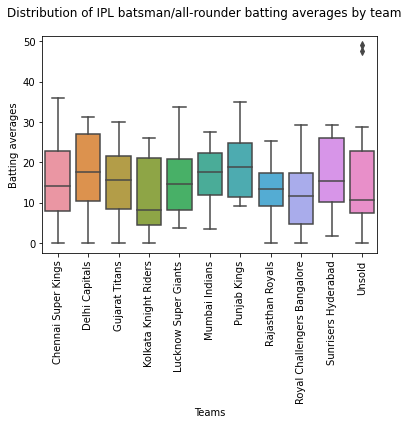

In [45]:
#Create a subset of the data concentrating only on non-Bowlers (ie, those with batting specialisms or functions)
Bat_AllR_WK = IPLPriceNPerf21_22.loc[IPLPriceNPerf21_22['Type']!='Bowler']
g=sns.boxplot(data=Bat_AllR_WK, x='Team', y='Bat_Avg_21_22')
plt.xlabel("Teams")
plt.xticks(rotation=90)
plt.ylabel("Batting averages")
plt.suptitle('Distribution of IPL batsman/all-rounder batting averages by team')
plt.savefig('Distribution of batting averages by team')
plt.show()

Can get a reasonable sense of where some teams have had a good return on their investment in relation to batsman, notably Delhi Capitals, Chennai Super Kings, and to extent the Punjab Kings, Rajasthan Royals and Sunriser Hyderabad, although they  of course appeared to be paying more in the auction. On the other hand, Royal Challengeres Bangalore and Mumbai Indians seemed to have flopped with their batting purchasing.

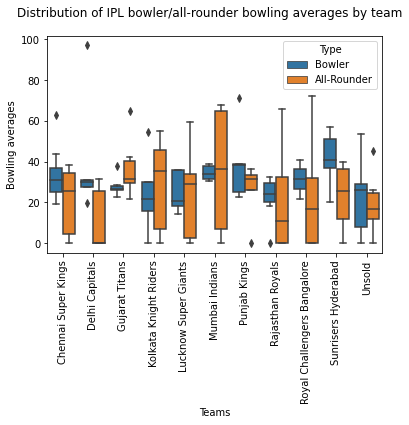

In [46]:
#Repeat above but for bowlers, inc All Rounders
BowlersAR = IPLPriceNPerf21_22[IPLPriceNPerf21_22['Type'].isin(['Bowler', 'All-Rounder'])]
g=sns.boxplot(data=BowlersAR, x='Team', y='Bowl_Avg_21_22', hue='Type')
plt.xlabel("Teams")
plt.xticks(rotation=90)
plt.ylabel("Bowling averages")
plt.suptitle('Distribution of IPL bowler/all-rounder bowling averages by team')
plt.savefig('Distribution of bowling averages by team')
plt.show()

Of course, lower is better with bowling averages, so Rajasthan Royals, Delhi Capitals and Royal Challengers Bangalore seem to be the winners (the latter in contrast to their batting purchases). And notable how generally speaking All Rounders outpeform the specialist bowlers).

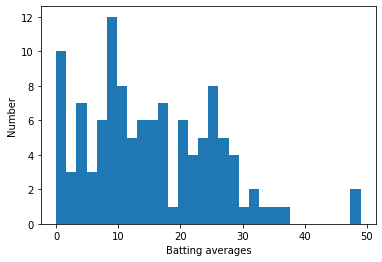

In [47]:
#Histogram of batting averages
fig, ax = plt.subplots()
_ = ax.hist(Bat_AllR_WK['Bat_Avg_21_22'], bins=30)
_ = ax.set_xlabel('Batting averages')
_ = ax.set_ylabel('Number')
plt.show()

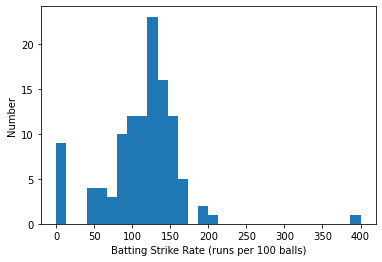

In [48]:
#Histogram of Batting Strike Rate
fig, ax = plt.subplots()
_ = ax.hist(Bat_AllR_WK['BatSR_21_22'], bins=30)
_ = ax.set_xlabel('Batting Strike Rate (runs per 100 balls)')
_ = ax.set_ylabel('Number')
plt.show()

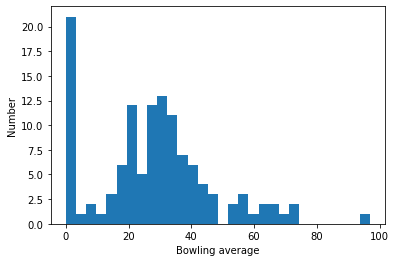

In [49]:
#Histogram of bowling averages (lower is better)
fig, ax = plt.subplots()
_ = ax.hist(BowlersAR['Bowl_Avg_21_22'], bins=30)
_ = ax.set_xlabel('Bowling average')
_ = ax.set_ylabel('Number')
plt.show()

In [50]:
Bat_AllR_WK.describe()


,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,HS_22,Bat_Avg_21_22,BF_21_22,BatSR_21_22,100s_21_22,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
count,1.140000e+02,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,3.328374e+05,7.842105,1.842105,193.543860,22.824561,32.535088,15.334738,148.763158,112.777603,0.026316,...,2.973684,13.557471,3.545171,9.525774,0.052632,0.017544,18.929825,4.236842,0.934211,0.122807
std,3.994733e+05,9.206172,2.612356,228.343095,27.099047,32.222451,10.328146,171.634583,52.320069,0.160779,...,7.064132,20.059743,4.830160,14.334714,0.260772,0.131866,40.309800,4.655005,1.697881,0.517659
min,1.994400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.986000e+04,0.000000,0.000000,26.750000,0.000000,2.250000,8.062500,27.000000,90.625000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.495800e+05,4.000000,1.000000,88.500000,13.000000,21.500000,14.333333,81.500000,121.631706,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,5.671575e+05,13.500000,2.000000,274.500000,42.750000,56.000000,22.972222,218.750000,136.917163,0.000000,...,3.000000,27.546875,7.927232,17.859375,0.000000,0.000000,22.750000,6.750000,1.500000,0.000000
max,1.844820e+06,32.000000,15.000000,1047.000000,101.000000,140.000000,49.000000,846.000000,400.000000,1.000000,...,51.000000,72.000000,26.666667,66.000000,2.000000,1.000000,252.000000,19.000000,9.000000,4.000000


In [51]:
BowlersAR.describe()

,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,HS_22,Bat_Avg_21_22,BF_21_22,BatSR_21_22,100s_21_22,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
count,1.210000e+02,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0
mean,3.006022e+05,4.479339,1.677686,65.793388,9.694215,13.256198,6.835860,52.694215,85.983072,0.0,...,8.487603,27.831428,7.106827,19.473708,0.214876,0.024793,58.305785,2.743802,0.471074,0.0
std,3.790221e+05,6.132019,2.005056,128.357763,16.136833,19.792477,6.996419,94.998495,63.752369,0.0,...,10.945407,19.147949,3.545709,13.586099,0.486597,0.156141,75.855547,3.453329,1.043427,0.0
min,1.994400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.986000e+04,0.000000,0.000000,2.000000,0.000000,0.000000,0.833333,4.000000,38.461538,0.0,...,1.000000,18.142857,6.842105,14.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0
50%,1.096920e+05,2.000000,1.000000,18.000000,0.000000,4.000000,5.000000,19.000000,96.875000,0.0,...,4.000000,28.750000,8.142857,18.000000,0.000000,0.000000,29.000000,2.000000,0.000000,0.0
75%,4.188240e+05,6.000000,2.000000,56.000000,15.000000,18.000000,10.750000,48.000000,126.530612,0.0,...,11.000000,37.714286,9.227273,24.500000,0.000000,0.000000,79.000000,4.000000,0.000000,0.0
max,1.844820e+06,32.000000,10.000000,744.000000,80.000000,95.000000,31.375000,565.000000,400.000000,0.0,...,51.000000,97.000000,13.200000,72.000000,2.000000,1.000000,314.000000,17.000000,4.500000,0.0


<AxesSubplot:xlabel='Bat_Avg_21_22', ylabel='Auc_Base_price_pounds'>

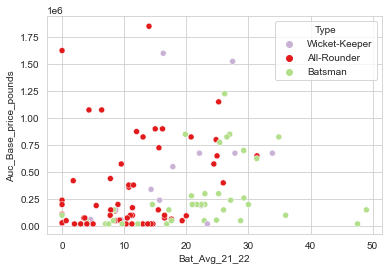

In [52]:
#Scatter plot of batting average versus price, filtered by player type
sns.set_style(style='whitegrid')
sns.scatterplot(
    data=Bat_AllR_WK, 
    x='Bat_Avg_21_22', 
    y='Auc_Base_price_pounds', 
    hue='Type',
    palette='Paired_r'
    )

<AxesSubplot:xlabel='BatSR_21_22', ylabel='Auc_Base_price_pounds'>

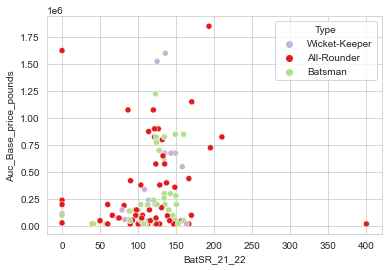

In [53]:
#Scatter plot of batting strike rate and price, filtered by player type
sns.scatterplot(
    data=Bat_AllR_WK, 
    x='BatSR_21_22', 
    y='Auc_Base_price_pounds', 
    hue='Type',
    palette='Paired_r'
    )

<AxesSubplot:xlabel='Run_21_22', ylabel='Auc_Base_price_pounds'>

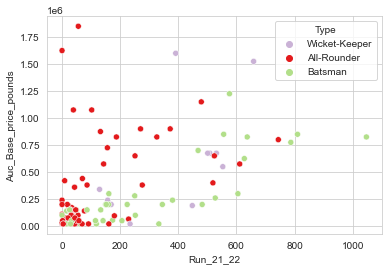

In [54]:
#Scatterplot of total runs and price, filtered by player type
sns.scatterplot(
    data=Bat_AllR_WK, 
    x='Run_21_22', 
    y='Auc_Base_price_pounds', 
    hue='Type',
    palette='Paired_r'
    )

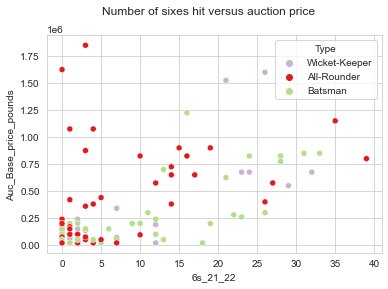

In [71]:
#Scatterplot of Number of 6s hit by batsmen against price
sns.scatterplot(
    data=Bat_AllR_WK, 
    x='6s_21_22', 
    y='Auc_Base_price_pounds', 
    hue='Type',
    palette='Paired_r'
    )
plt.suptitle('Number of sixes hit versus auction price')
plt.savefig('Number of sixes hit versus price')

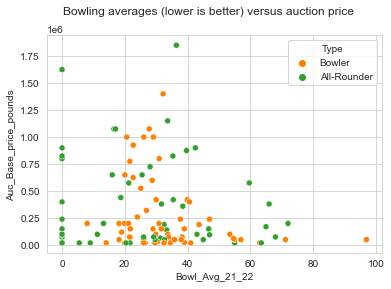

In [70]:
#Scatterplot of bowling averages (lower is better) and price
sns.scatterplot(
    data=BowlersAR, 
    x='Bowl_Avg_21_22', 
    y='Auc_Base_price_pounds',
    hue='Type',
    palette='Paired_r'
    )
plt.suptitle('Bowling averages (lower is better) versus auction price')
plt.savefig('Bowling average versus price')

<AxesSubplot:xlabel='Econ_21_22', ylabel='Auc_Base_price_pounds'>

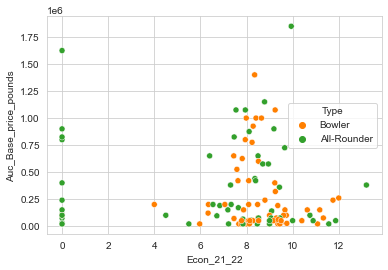

In [57]:
#Scatterplot of bowler economy rate (lower is better) and price
sns.scatterplot(
    data=BowlersAR, 
    x='Econ_21_22', 
    y='Auc_Base_price_pounds',
    hue='Type',
    palette='Paired_r'
    )

<AxesSubplot:xlabel='Wkts_21_22', ylabel='Auc_Base_price_pounds'>

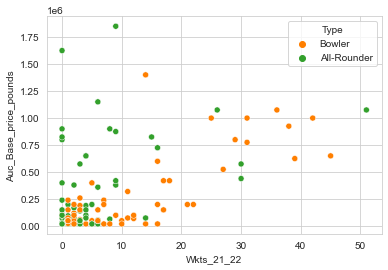

In [58]:
#Scatterplot of total wickets and price
sns.scatterplot(
    data=BowlersAR, 
    x='Wkts_21_22', 
    y='Auc_Base_price_pounds',
    hue='Type',
    palette='Paired_r'
    )

<AxesSubplot:xlabel='BowlSR_21_22', ylabel='Auc_Base_price_pounds'>

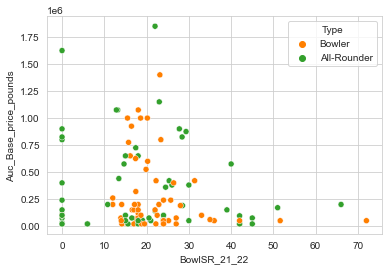

In [59]:
#Scatterplot of bowling strike rate (Lower is better) and price
sns.scatterplot(
    data=BowlersAR, 
    x='BowlSR_21_22', 
    y='Auc_Base_price_pounds',
    hue='Type',
    palette='Paired_r'
    )

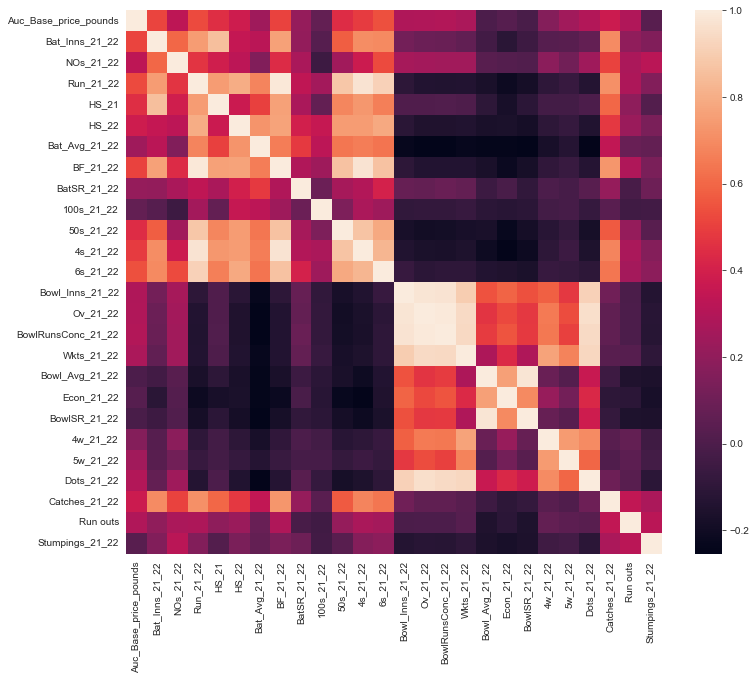

In [60]:
plt.subplots(figsize=(12,10))
sns.heatmap(Bat_AllR_WK.corr());

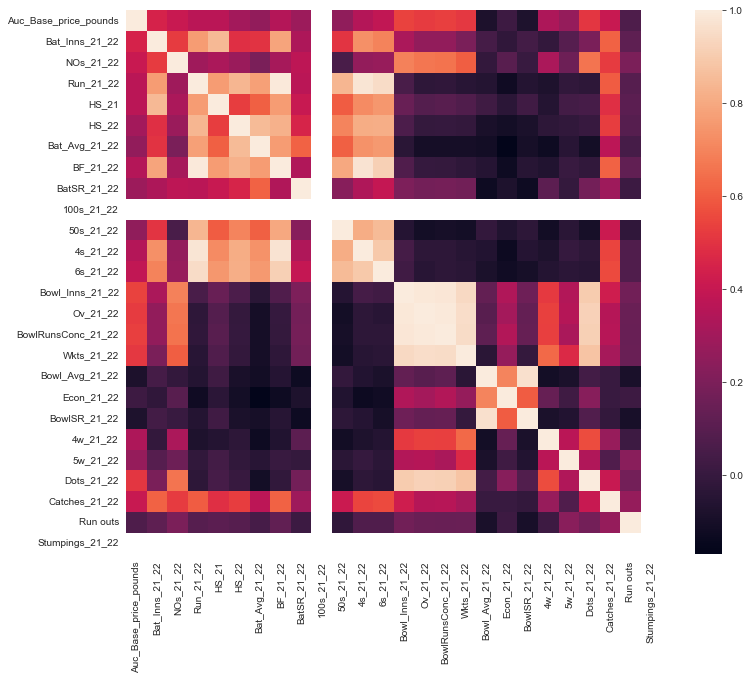

In [61]:
plt.subplots(figsize=(12,10))
sns.heatmap(BowlersAR.corr());

In [62]:
# define function to create scatterplots of auction prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Auc_Base_price_pounds', data=Bat_AllR_WK, alpha=0.5)
        ax.set(xlabel=col, ylabel='Auction price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [63]:
#Use a list comprehension to build a list of features from the columns of `Bat_AllR_WK` that
#are not in any of ones  listed here.
features = [column for column in Bat_AllR_WK.columns if column not in ['Player', 'Country', 'Team', 'Type', 'Auc_Base_price_pounds']]


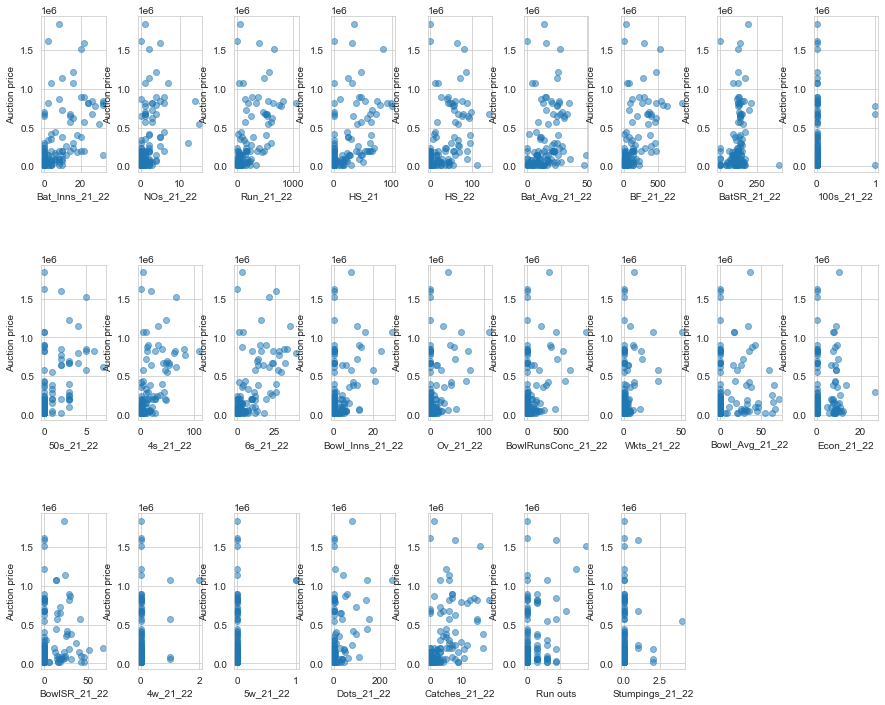

In [64]:
scatterplots(features, ncol=9, figsize=(15, 12))

In [65]:
# define function to create scatterplots of auction prices against desired columns
def scatterplots2(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Auc_Base_price_pounds', data=BowlersAR, alpha=0.5)
        ax.set(xlabel=col, ylabel='Auction price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [66]:
#Use a list comprehension to build a list of features from the columns of `Bat_AllR_WK` that
#are not in any of ones  listed here.
features = [column for column in BowlersAR.columns if column not in ['Player', 'Country', 'Team', 'Type', 'Auc_Base_price_pounds']]


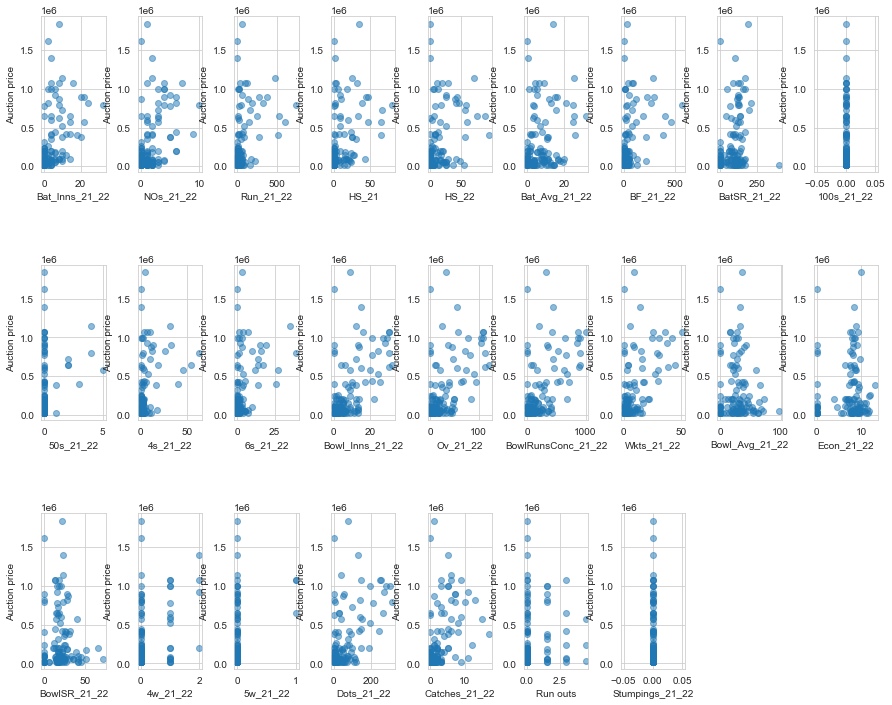

In [67]:
#For Bowlers and Allrounders
scatterplots2(features, ncol=9, figsize=(15, 12))

### 2.5 Observations on the scatterplots
It's hard to see lots of strong correlations from the different plots - but there appears to be a positive relationship between price and batting qualities such as total runs (but not necessarily average), number of 50s scored, number of 6s, as you might expect. For bowlers, it appears to be about total wickets taken, bowling average, strike rate and also dot balls (so the number of times you bowl a ball that isn't scored off - certainly a valuable commodity in this form of cricket). 



##Save new or revised datasets


In [68]:
IPLPriceNPerf21_22.to_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\interim_data\after_EDA\IPLPriceNPerf21_22_afterEDA_data.csv')
BowlersAR.to_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\interim_data\after_EDA\BowlersAR_21_22_afterEDA_data.csv')
Bat_AllR_WK.to_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\interim_data\after_EDA\Bat_AllR_WK_21_22_afterEDA_data.csv')


## 2.6 Some initial conclusions
The additional work on the datasets need has been useful, especially with a wider range of performance data, for more players, plus also data across the different disciplines. There needs to be a further check on the bowling data, or else the existing data needs to be manipulated further to make it more useful.

The streamlining of the data that was identified in the earlier version of this notebook has been addressed in the data wrangling phase and it is now easier to work with.

Need also to give consideration to some creating some composite statistics, eg, related to batting averages and runs faced, or NO (not outs) as an average of innings played, and for bowlers (econ rates linked with overs bowled, Strike rate and actual wickets), etc

It would also be useful to do more analysis at a team level, as this might indicate different purchasing strategies. 

